In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import time



In [2]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [3]:
# Read in data from large csv to a dataframe
df1=pd.read_csv('weather_large.csv', sep=',')

# Reformat data in date/time column 
df1['Formatted Date'] =  pd.to_datetime(df1['Formatted Date'])

# Create a new column for year / month / hour
df1['Year'] = pd.DatetimeIndex(df1['Formatted Date']).year
df1['Month'] = pd.DatetimeIndex(df1['Formatted Date']).month
df1['Hour'] = pd.DatetimeIndex(df1['Formatted Date']).hour

# Encode month and hour for cyclical nature
df1 = encode(df1, 'Month', 13)
df1 = encode(df1, 'Hour', 23)
df1 = encode(df1, 'Wind Bearing (degrees)', 359)

# Remove original date/time column
df1=df1.drop(['Formatted Date'],axis=1)

# Convert columns to factors
df1['Summary'] = df1['Summary'].astype('category')
df1['Precip Type'] = df1['Precip Type'].astype('category')
df1['Daily Summary'] = df1['Daily Summary'].astype('category')

# Create a column stating whether its mostly cloudy / overcast or not in summary
df1['Heavy_Cloud'] = pd.np.where(df1.Summary.str.contains("Mostly Cloudy"), 1,
                    pd.np.where(df1.Summary.str.contains("Overcast"), 1,
                    pd.np.where(df1.Summary.str.contains("Foggy"), 1,0)))

# Convert to boolean and print count
df1['Heavy_Cloud']=df1['Heavy_Cloud'].astype('bool')

In [4]:
# df.dtypes
y = df1['Apparent Temperature (C)']
X=df1['Temperature (C)']

# Create Training&Validation / Test set - split of 70/20/10
X_intermediate, X_test, y_intermediate, y_test = train_test_split(X,y,test_size=0.1) 
X_valid, X_train, y_valid, y_train = train_test_split(X_intermediate, y_intermediate,
                                                      test_size=0.78)
# delete intermediate variables
X_intermediate, y_intermediate

print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(df1),2),
                                                       round(len(y_valid)/len(df1),2),
                                                       round(len(y_test)/len(df1),2)))

# Reshape training data so model can be fit
X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)

start_time = time.clock()
# Fit a linear regression model to the training data
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
# Reshape validation data so that model can be run
X_valid=X_valid.values.reshape(-1,1)
# Predictions on validation data
predictions = model.predict(X_valid)
print (time.clock() - start_time, "seconds")

train: 0.7% | validation: 0.2% | test 0.1%
0.015463000000000005 seconds


In [5]:
print ('Coefficient of determination of the prediction on validation data:', model.score(X_valid, y_valid))

## Error metrics
print('Mean Absolute Error on validation data:', metrics.mean_absolute_error(y_valid, predictions))  
print('Mean Squared Error on validation data:', metrics.mean_squared_error(y_valid, predictions))  
print('Root Mean Squared Error on validation data:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))  


# Reshape test data so that model can be run
X_test=X_test.values.reshape(-1,1)
# Predictions on validation data
predictions_test = model.predict(X_test)

print ('Coefficient of determination of the prediction on test data:', model.score(X_test, y_test))

## Error metrics
print('Mean Absolute Error on test data:', metrics.mean_absolute_error(y_test, predictions_test))  
print('Mean Squared Error on test data:', metrics.mean_squared_error(y_test, predictions_test))  
print('Root Mean Squared Error on test data:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test))) 

Coefficient of determination of the prediction on validation data: 0.9854224782792418
Mean Absolute Error on validation data: 0.9880975158193925
Mean Squared Error on validation data: 1.6633473145830062
Root Mean Squared Error on validation data: 1.2897082284699148
Coefficient of determination of the prediction on test data: 0.9853103830645584
Mean Absolute Error on test data: 0.9999924351186146
Mean Squared Error on test data: 1.730305284811314
Root Mean Squared Error on test data: 1.3154106905492726


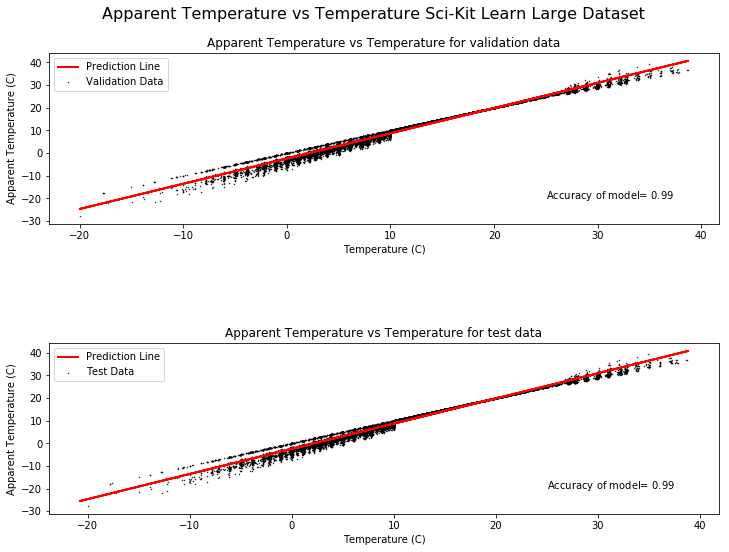

In [6]:
fig, (ax1,ax2) =plt.subplots(nrows=2,ncols=1,figsize=(12,8))

fig.suptitle('Apparent Temperature vs Temperature Sci-Kit Learn Large Dataset', fontsize=16)
# Plot outputs of the actual validation data vs the prediction line

ax1.scatter(X_valid, y_valid, color='black', s=0.2,label='Validation Data')
ax1.plot(X_valid, predictions, color = 'r', linewidth=2,label='Prediction Line')
ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Apparent Temperature (C)')
ax1.set_title('Apparent Temperature vs Temperature for validation data')
ax1.legend(loc=2)
textstr = 'Accuracy of model= $%.2f$'%(model.score(X_valid, y_valid))
ax1.text(25,-20,textstr)

# Plot outputs of the test data vs the prediction line

ax2.scatter(X_valid, y_valid, color='black', s=0.2,label='Test Data')
ax2.plot(X_test, predictions_test, color = 'r', linewidth=2,label='Prediction Line')
ax2.set_xlabel('Temperature (C)')
ax2.set_ylabel('Apparent Temperature (C)')
ax2.set_title('Apparent Temperature vs Temperature for test data')
ax2.legend(loc=2)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.125, right=0.9, hspace=0.7 ,wspace=0.5)
textstr = 'Accuracy of model= $%.2f$'%(model.score(X_test, y_test))
ax2.text(25,-20,textstr)

fig.savefig('Linear_Regression_Large_SK.png',pdi=600)